# Working with strings in Pandas

We introduced some of these methods already in the Pandas Fundamentals course when we learned the following data cleaning tasks:

- Cleaning column names
- Extracting values from the start of strings
- Extracting values from the end of strings

In this mission, we'll learn a couple other string cleaning tasks such as:

Finding specific strings or substrings in columns
Extracting substrings from unstructured data
Removing strings or substrings from a series
As we learn these tasks, we'll also work to build intuition around how these string methods operate so that you can explore methods we haven't explicitly covered on your own.

We'll work with the 2015 World Happiness Report again and additional economic data from the World Bank. You can find the data set here. Here's a preview of the data set:


- ShortName - Name of the country
- Region - The region the country belongs to
- IncomeGroup - The income group the country belongs to, based on Gross National Income (GNI) per capita
- CurrencyUnit - Name of country's currency
- SourceOfMostRecentIncomeAndExpenditureData - The name of the survey used to collect the income and expenditure data
- SpecialNotes - Contains any miscellaneous notes about the data
To start, let's read the data sets into pandas and combine them.

### Instructions

We've already read World_Happiness_2015.csv into a dataframe called happiness2015 and World_dev.csv into a dataframe called world_dev.

- Use the pd.merge() function to combine happiness2015 and world_dev. Save the resulting dataframe to merged. As a reminder, you can use the following syntax to combine the dataframes: pd.merge(left=df1, right=df2, how='left', left_on='left_df_Column_Name', right_on='right_df_Column_Name').
    - Set the left_on parameter to the Country column from happiness2015 and the right_on parameter to the ShortName column from world_dev.
- Use the DataFrame.rename() method to rename the SourceOfMostRecentIncomeAndExpenditureData column in merged to IESurvey (because we don't want to keep typing that long name!).
    - We've already saved the mapping to a dictionary named col_renaming.
    - Make sure to set the axis parameter to 1.

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
happiness2015 = pd.read_csv('World_Happiness_2015.csv')
world_dev = pd.read_csv("World_dev.csv")
col_renaming = {'SourceOfMostRecentIncomeAndExpenditureData': 'IESurvey'}

In [64]:

merged = pd.merge(left=happiness2015,right=world_dev, how='left', left_on='Country', right_on='ShortName')
merged = merged.rename(col_renaming, axis=1)

In [20]:
merged.loc[:3]

,Country,Region_x,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),...,GovernmentAccountingConcept,ImfDataDisseminationStandard,LatestPopulationCensus,LatestHouseholdSurvey,IESurvey,VitalRegistrationComplete,LatestAgriculturalCensus,LatestIndustrialData,LatestTradeData,LatestWaterWithdrawalData
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,...,Consolidated central government,Special Data Dissemination Standard (SDDS),2010,NaN,"Expenditure survey/budget survey (ES/BS), 2004",Yes,2008,2010.0,2013.0,2000.0
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,...,Consolidated central government,Special Data Dissemination Standard (SDDS),2011,NaN,"Integrated household survey (IHS), 2010",Yes,2010,2005.0,2013.0,2005.0
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,...,Consolidated central government,Special Data Dissemination Standard (SDDS),2011,NaN,"Income tax registers (ITR), 2010",Yes,2010,2010.0,2013.0,2009.0
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,...,Consolidated central government,Special Data Dissemination Standard (SDDS),2011,NaN,"Income survey (IS), 2010",Yes,2010,2010.0,2013.0,2006.0


Instructions

- Write a function called extract_last_word with the following criteria:
    - The function should accept one parameter called element.
    - Use the string.split() method to split the object into a list. First convert element to a string as follows: str(element).
    - Return the last word of the list.
- Use the Series.apply() method to apply the function to the CurrencyUnit column. Save the result to merged['Currency Apply'].
- Use the Series.head() method to print the first five rows in merged['Currency Apply'].

In [65]:
def extract_last_word(element):
    element = str(element)
    return element.split()[-1]
merged['Currency Apply'] = merged.CurrencyUnit.apply(extract_last_word)
merged['Currency Apply'].head(3)

0    franc
1    krona
2    krone
Name: Currency Apply, dtype: object

We learned in the last mission that we should use built-in vectorized methods (if they exist) instead of the Series.apply() method for performance reasons.

Instead, we could've split each element in the CurrencyUnit column into a list of strings with the Series.str.split() method, the vectorized equivalent of Python's string.split() method.
Below are some common vectorized string methods, but you can find the full list here:
<table class="tg">
<tbody><tr>
<th>Method</th>
<th>Description</th>
</tr>
<tr>
<td>Series.str.split()</td>
<td>Splits each element in the Series.</td>
</tr>
<tr>
<td>Series.str.strip()</td>
<td>Strips whitespace from each string in the Series.</td>
</tr>
<tr>
<td>Series.str.lower()</td>
<td>Converts strings in the Series to lowercase.</td>
</tr>
<tr>
<td>Series.str.upper()</td>
<td>Converts strings in the Series to uppercase.</td>
</tr>
<tr>
<td>Series.str.get()</td>
<td>Retrieves the ith element of each element in the Series.</td>
</tr>
<tr>
<td><span style="font-weight:300;font-style:normal">Series.str.replace()</span></td>
<td><span style="font-weight:300;font-style:normal">Replaces a regex or string in the Series with another string.</span></td>
</tr>
<tr>
<td>Series.str.cat()</td>
<td>Concatenates strings in a Series.</td>
</tr>
<tr>
<td><span style="font-weight:300;font-style:normal">Series.str.extract()</span></td>
<td><span style="font-weight:300;font-style:normal">Extracts substrings from the Series matching a regex pattern.</span></td>
</tr>
</tbody></table>
It's also good to know that vectorized string methods can be chained. For example, suppose we needed to split each element in the CurrencyUnit column into a list of strings using the Series.str.split() method and capitalize the letters using the Series.str.upper() method. You can use the following syntax to apply more than one method at once:
```python
merged['CurrencyUnit'].str.upper().str.split()
```
Instructions

Use the Series.str.split() method to split the CurrencyUnit column into a list of words and then use the Series.str.get() method to select just the last word. Assign the result to merged['Currency Vectorized'].
Use the Series.head() method to print the first five rows in merged['Currency Vectorized'].

In [66]:
merged['Currency Vectorized'] = merged.CurrencyUnit.str.split().str.get(-1)
merged['Currency Vectorized'].head()

0     franc
1     krona
2     krone
3     krone
4    dollar
Name: Currency Vectorized, dtype: object

Instructions

- Use the Series.str.len() method to return the length of each element in the CurrencyUnit column. Assign the result to lengths.
- Use the Series.value_counts() method to return the count of unique values in lengths. Set the dropna parameter to False so NaNs are counted, too. Assign the result to value_counts.
    - If value_counts contains NaNs, it means the Series.str.len() method excluded them and didn't treat them as strings.

In [67]:
lengths = merged.CurrencyUnit.str.len()
value_counts = lengths.value_counts(dropna=False)
value_counts

14.0    21
4.0     20
12.0    17
13.0    14
NaN     13
15.0    13
16.0    12
18.0     9
17.0     9
11.0     8
22.0     7
25.0     5
19.0     3
9.0      2
10.0     1
39.0     1
26.0     1
23.0     1
20.0     1
Name: CurrencyUnit, dtype: int64

<div id="body" class="MissionLearn__section MissionMarkup__light"><div><p>In the last exercise, we identified a third benefit of using vectorized string methods - they exclude missing values:</p>
<ol>
<li>Better performance</li>
<li>Code that is easier to read and write</li>
<li>Automatically excludes missing values</li>
</ol>
<p>Now that we know the benefits of using vectorized string methods, let's practice using them for specific data cleaning tasks.</p>
<p>Suppose we needed to parse the elements of a Series to find a string or substring that doesn't appear in the same position in each string. For example, let's look at the <code>SpecialNotes</code> column. A number of rows mention "national accounts", but the words appear in different places in each comment:</p>
</div><div class="dq_theme MissionMarkup__light-code DqEditor__root"><textarea autocomplete="off" style="display: none;">April 2013 database update: Based on IMF data, national accounts data were revised for 2000 onward; the **base year** changed to 2002.
Based on IMF data, national accounts data have been revised for 2005 onward; the new base year is 2005.</textarea><div class="CodeMirror cm-s-dq-light CodeMirror-wrap"><div style="overflow: hidden; position: relative; width: 3px; height: 0px; top: 7.50001px; left: 4px;"><textarea autocorrect="off" autocapitalize="off" spellcheck="false" tabindex="0" style="position: absolute; bottom: -1em; padding: 0px; width: 1000px; height: 1em; outline: none;"></textarea></div><div class="CodeMirror-vscrollbar" cm-not-content="true"><div style="min-width: 1px; height: 0px;"></div></div><div class="CodeMirror-hscrollbar" cm-not-content="true"><div style="height: 100%; min-height: 1px; width: 0px;"></div></div><div class="CodeMirror-scrollbar-filler" cm-not-content="true"></div><div class="CodeMirror-gutter-filler" cm-not-content="true"></div><div class="CodeMirror-scroll" tabindex="-1"><div class="CodeMirror-sizer" style="margin-left: 0px; margin-bottom: -11px; border-right-width: 19px; min-height: 91px; padding-right: 0px; padding-bottom: 0px;"><div style="position: relative; top: 0px;"><div class="CodeMirror-lines" role="presentation"><div role="presentation" style="position: relative; outline: none;"><div class="CodeMirror-measure"><pre><span>xxxxxxxxxx</span></pre></div><div class="CodeMirror-measure"></div><div style="position: relative; z-index: 1;"></div><div class="CodeMirror-cursors"><div class="CodeMirror-cursor" style="left: 4px; top: 0px; height: 18px;">&nbsp;</div></div><div class="CodeMirror-code" role="presentation" style=""><pre class=" CodeMirror-line " role="presentation"><span role="presentation" style="padding-right: 0.1px;"><span class="cm-variable">April</span> <span class="cm-number">2013</span> <span class="cm-variable">database</span> <span class="cm-variable">update</span>: <span class="cm-variable">Based</span> <span class="cm-variable">on</span> <span class="cm-variable">IMF</span> <span class="cm-variable">data</span>, <span class="cm-variable">national</span> <span class="cm-variable">accounts</span> <span class="cm-variable">data</span> <span class="cm-variable">were</span> <span class="cm-variable">revised</span> <span class="cm-keyword">for</span> <span class="cm-number">2000</span> <span class="cm-variable">onward</span>; <span class="cm-variable">the</span> <span class="cm-operator">**</span><span class="cm-variable">base</span> <span class="cm-variable">year</span><span class="cm-operator">**</span> <span class="cm-variable">changed</span> <span class="cm-variable">to</span> <span class="cm-number">2002.</span></span></pre><pre class=" CodeMirror-line " role="presentation"><span role="presentation" style="padding-right: 0.1px;"><span class="cm-variable">Based</span> <span class="cm-variable">on</span> <span class="cm-variable">IMF</span> <span class="cm-variable">data</span>, <span class="cm-variable">national</span> <span class="cm-variable">accounts</span> <span class="cm-variable">data</span> <span class="cm-variable">have</span> <span class="cm-variable">been</span> <span class="cm-variable">revised</span> <span class="cm-keyword">for</span> <span class="cm-number">2005</span> <span class="cm-variable">onward</span>; <span class="cm-variable">the</span> <span class="cm-variable">new</span> <span class="cm-variable">base</span> <span class="cm-variable">year</span> <span class="cm-keyword">is</span> <span class="cm-number">2005.</span></span></pre></div></div></div></div></div><div style="position: absolute; height: 19px; width: 1px; border-bottom: 0px solid transparent; top: 91px;"></div><div class="CodeMirror-gutters" style="display: none; height: 110px;"></div></div></div></div><div>
<p>If we wanted to determine how many comments contain this phrase, could we split them into lists? Since the formats are different, how could we tell which element contains the "national accounts" phrase? </p>
<p>We can handle problems like this with <strong>regular expressions</strong>, or <strong>regex</strong> for short. A regular expression is a sequence of characters that describes a search pattern, used to match characters in a string:</p>
<div class="size_55_center">
<img alt="Regular_Expressions" src="Regular_Expressions.png">
</div>
<p>In pandas, regular expressions is integrated with vectorized string methods to make finding and extracting patterns of characters easier. However, the rules for creating regular expressions can be quite complex, so don't worry about memorizing them. In this mission, we'll provide guidance on how to create the regex we need to use for the exercises, but you can also follow along using <a target="_blank" href="https://docs.python.org/3.4/library/re.html">this documentation</a>.</p></div></div>
Instructions
Learn

In the last exercise, we identified a third benefit of using vectorized string methods - they exclude missing values:

Better performance
Code that is easier to read and write
Automatically excludes missing values
Now that we know the benefits of using vectorized string methods, let's practice using them for specific data cleaning tasks.

Suppose we needed to parse the elements of a Series to find a string or substring that doesn't appear in the same position in each string. For example, let's look at the SpecialNotes column. A number of rows mention "national accounts", but the words appear in different places in each comment:

April 2013 database update: Based on IMF data, national accounts data were revised for 2000 onward; the **base year** changed to 2002.
Based on IMF data, national accounts data have been revised for 2005 onward; the new base year is 2005.
If we wanted to determine how many comments contain this phrase, could we split them into lists? Since the formats are different, how could we tell which element contains the "national accounts" phrase?

We can handle problems like this with regular expressions, or regex for short. A regular expression is a sequence of characters that describes a search pattern, used to match characters in a string:

Regular_Expressions
In pandas, regular expressions is integrated with vectorized string methods to make finding and extracting patterns of characters easier. However, the rules for creating regular expressions can be quite complex, so don't worry about memorizing them. In this mission, we'll provide guidance on how to create the regex we need to use for the exercises, but you can also follow along using this documentation.

### Instructions

We've already saved the regex to a variable called pattern. The brackets, [], indicate that either "national accounts" or "National accounts" should produce a match.

- Use the Series.str.contains() method to search for pattern in the SpecialNotes column. Assign the result to national_accounts.
- Use the Series.head() method to print the first five rows in national_accounts.

In [68]:
pattern = r"[Nn]ational accounts"
national_accounts = merged.SpecialNotes.str.contains(pattern)
national_accounts.head()

0     NaN
1     NaN
2     NaN
3     NaN
4    True
Name: SpecialNotes, dtype: object

### Instructions

- Use the Series.str.contains() method to search for pattern in the SpecialNotes column again. This time, also pass in the na parameter and set it to False. Assign the result to national_accounts.
- Use national_accounts to index merged, so that only rows that contain "national accounts" or "National accounts" in the SpecialNotes column are returned. Assign the result to merged_national_accounts.
- Use the DataFrame.head() method to print the first five rows in merged_national_accounts.

In [69]:
national_accounts = merged.SpecialNotes.str.contains(pattern, na=False)
merged_national_accounts = merged[national_accounts]
merged_national_accounts.head()

,Country,Region_x,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),...,LatestPopulationCensus,LatestHouseholdSurvey,IESurvey,VitalRegistrationComplete,LatestAgriculturalCensus,LatestIndustrialData,LatestTradeData,LatestWaterWithdrawalData,Currency Apply,Currency Vectorized
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,...,2011,NaN,"Labor force survey (LFS), 2010",Yes,2011,2011.0,2013.0,1986.0,dollar,dollar
7,Sweden,Western Europe,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,...,2011,NaN,"Income survey (IS), 2005",Yes,2010,2010.0,2013.0,2007.0,krona,krona
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,...,2013,NaN,NaN,Yes,2012,2010.0,2013.0,2002.0,dollar,dollar
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,...,2011,NaN,"Expenditure survey/budget survey (ES/BS), 2003",Yes,2011,2011.0,2013.0,2000.0,dollar,dollar
14,United States,North America,15,7.119,0.03839,1.39451,1.24711,0.86179,0.54604,0.15890,...,2010,NaN,"Labor force survey (LFS), 2010",Yes,2012,2008.0,2013.0,2005.0,dollar,dollar


<div id="body" class="MissionLearn__section MissionMarkup__light"><div><p>In the last screen, we learned how to use regular expressions and the <code>Series.str.contains()</code> method to search for patterns of characters in a column and index the dataframe based on the matches. Let's continue exploring the versatility of regular expressions while learning a new task - extracting characters from strings.</p>
<p>Suppose we wanted to extract any year mentioned in the <code>SpecialNotes</code> column. Notice that the characters in a year follow a specific pattern:</p>
<div class="size_55_center">
<img alt="Years" src="Years.png">
</div>
The first digit can be either 1 or 2, while the last three digits can be any number between 0 and 9.

With regular expressions, we use the following syntax to indicate a character could be a range of numbers:

pattern = r"[0-9]"
And we use the following syntax to indicate a character could be a range of letters:

### lowercase letters
pattern1 = r"[a-z]"

### uppercase letters
pattern2 = r"[A-Z]"
    
We could also make these ranges more restrictive. For example, if we wanted to find a three character substring in a column that starts with a number between 1 and 6 and ends with two letters of any kind, we could use the following syntax:

pattern = r"[1-6][a-z][a-z]"
If we have a pattern that repeats, we can also use curly brackets { and } to indicate the number of times it repeats:

pattern = r"[1-6][a-z][a-z]" = r"[1-6][a-z]{2}"
    
<p>Let's use what we've learned to explore the <a target="_blank" href="https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.str.extract.html"><code>Series.str.extract()</code> method</a>.</p></div></div>

### Instructions

- Create a regular expression that will match years and assign it to the variable pattern. Note: we've already set up the pattern variable. Insert your answer inside the parantheses: "(your_answer)".
- Use pattern and the Series.str.extract() method to extract years from the SpecialNotes column. Assign the resulting Series to years.

In [70]:
pattern = r"([1-2][0-9][0-9][0-9])"
years = merged.SpecialNotes.str.extract(pattern)
years[0:5]

,0
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN


When we used the Series.str.extract() method, we enclosed our regular expression in parentheses. The parentheses indicate that only the character pattern matched should be extracted and returned in a series. We call this a capturing group.
We can also return the results as a dataframe by changing the expand parameter to True.

Let's try that next.

### Instructions

- Use pattern and the Series.str.extract() method to extract years from the SpecialNotes column again, but this time, set the expand parameter to True to return the results as a dataframe. Assign the resulting dataframe to years.

In [71]:
years = merged.SpecialNotes.str.extract(pattern, expand=True)
years[0:5]

,0
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN


In the last screen, we learned we could use the Series.str.extract() method to extract a pattern of characters from a column as a dataframe by setting the expand parameter equal to True. However, the Series.str.extract() method will only extract the first match of the pattern. If we wanted to extract all of the matches, we can use the Series.str.extractall() method.

We'll demonstrate this method but, first, let's make the results easier to read by using the df.set_index() method to set the Country column as the index.
```python
merged = merged.set_index('Country')
```
Next, let's use the same regular expression from the last screen to extract all the years from the Special Notes column, except this time, we'll use a named capturing group. Using a named capturing group means that we can refer to the group by the specified name instead of just a number. We can use the following syntax to add a name: (?P<Column_Name>...).

Below, we name the capturing group Years:
```python
pattern = r"(?P<Years>[1-2][0-9]{3})"
merged['SpecialNotes'].str.extractall(pattern)
```
Below are the first five rows of the output:

![](Extractall.png)

Let's look at the IESurvey column next. This column has years in two different formats:

Integrated household survey (IHS), 2012
Integrated household survey (IHS), 2010/11
Let's test the code above on this column to see if we can extract all of the years from the IESurvey column.

### Instructions

We've already set the Country column as the index and saved the regular expression used to extract years in the pattern variable.

- Use the Series.str.extractall() method to extract all of the years in the IESurvey. Assign the result to years.
- Use the Series.value_counts() method to create a list of the unique years, along with the count. Assign the result to value_counts. Print value_counts.


In [72]:
pattern = r"(?P<Years>[1-2][0-9]{3})"
#merged.set_index('Country',inplace=True)
years = merged.IESurvey.str.extractall(pattern)
value_counts = years.Years.value_counts()
value_counts

2012    33
2010    28
2011    22
2013    12
2009     8
2008     6
2005     6
2007     4
2004     3
1995     1
2003     1
1992     1
2002     1
1998     1
2006     1
2000     1
1999     1
Name: Years, dtype: int64

When we tried to extract all of the years from the IESurvey column using the extractall method in the last exercise, we were unsuccessful because some of our years had the following format:

![](Years_updated.png)

Let's add those two groups to our regex and try to extract them again:
```python
pattern = r"(?P<First_Year>[1-2][0-9]{3})(/)?(?P&#60;Second_Year&#62;[0-9]{2})?"
years = merged['IESurvey'].str.extractall(pattern)
```
Note that we also added a question mark, ?, after each of the two new groups to indicate that a match for those groups is optional. This allows us to extract years listed in the yyyy format AND the yyyy/yy format at once.

We've already created a regular expression that extracts the pattern "yyyy/yy" and saved it to a variable called pattern. Notice that we didn't enclose /? in parantheses so that the resulting dataframe will only contain a First_Year and Second_Year column.

Use the Series.str.extractall() method to extract pattern from the IESurvey column. Assign the result to years.
Use vectorized slicing to extract the first two numbers from the First_Year column in years (For example, extract "20" from "2000"). Assign the result to first_two_year.

Add first_two_year to the Second_Year column in years, so that Second_Year contains the full year (ex: "2000"). Assign the result to years['Second_Year'].

We've already created a regular expression that extracts the pattern "yyyy/yy" and saved it to a variable called pattern. Notice that we didn't enclose /? in parantheses so that the resulting dataframe will only contain a First_Year and Second_Year column.

- Use the Series.str.extractall() method to extract pattern from the IESurvey column. Assign the result to years.
- Use vectorized slicing to extract the first two numbers from the First_Year column in years (For example, extract "20" from "2000"). Assign the result to first_two_year.
- Add first_two_year to the Second_Year column in years, so that Second_Year contains the full year (ex: "2000"). Assign the result to years['Second_Year'].

In [74]:
pattern = r"(?P<First_Year>[1-2][0-9]{3})/?(?P<Second_Year>[0-9]{2})?"
years = merged.IESurvey.str.extractall(pattern)
first_two_year = years.First_Year.str[0:2]
years['Second_Year'] = first_two_year + years.Second_Year
#first_two_year.First_Year.str[:] + years.Second_Year.str[:]

<table class="tg">
<tbody><tr>
<th>Method</th>
<th>Description</th>
</tr>
<tr>
<td>Series.str.split()</td>
<td>Splits each element in the Series.</td>
</tr>
<tr>
<td>Series.str.strip()</td>
<td>Strips whitespace from each string in the Series.</td>
</tr>
<tr>
<td>Series.str.lower()</td>
<td>Converts strings in the Series to lowercase.</td>
</tr>
<tr>
<td>Series.str.upper()</td>
<td>Converts strings in the Series to uppercase.</td>
</tr>
<tr>
<td>Series.str.get()</td>
<td>Retrieves the ith element of each element in the Series.</td>
</tr>
<tr>
<td><span style="font-weight:300;font-style:normal">Series.str.replace()</span></td>
<td><span style="font-weight:300;font-style:normal">Replaces a regex or string in the Series with another string.</span></td>
</tr>
<tr>
<td>Series.str.cat()</td>
<td>Concatenates strings in a Series.</td>
</tr>
<tr>
<td><span style="font-weight:300;font-style:normal">Series.str.extract()</span></td>
<td><span style="font-weight:300;font-style:normal">Extracts substrings from the Series matching a regex pattern.</span></td>
</tr>
</tbody></table>


### Instructions

As a reminder, we would like to clean the values in the IncomeGroup column to a standardized format shown in the table below.

<table class="tg">
<tbody><tr>
<th>Current Values<br></th>
<th>Updated Values</th>
</tr>
<tr>
<td><span style="font-weight:400;font-style:normal">Upper middle income</span></td>
<td><span style="font-weight:400;font-style:normal">UPPER MIDDLE</span></td>
</tr>
<tr>
<td><span style="font-weight:400;font-style:normal">Lower middle income</span></td>
<td><span style="font-weight:400;font-style:normal">LOWER MIDDLE</span></td>
</tr>
<tr>
<td><span style="font-weight:400;font-style:normal">High income: OECD</span></td>
<td><span style="font-weight:400;font-style:normal">HIGH OECD</span></td>
</tr>
<tr>
<td><span style="font-weight:400;font-style:normal">Low income</span></td>
<td><span style="font-weight:400;font-style:normal">LOW</span></td>
</tr>
<tr>
<td><span style="font-weight:400;font-style:normal">High income: nonOECD</span></td>
<td><span style="font-weight:400;font-style:normal">HIGH NONOECD</span></td>
</tr>
</tbody></table>

- Use some of the string methods above to clean the IncomeGroup column.
- Make sure to remove the whitespace at the end of the strings.
- Use the df.pivot_table() method to return the mean of each income group in the IncomeGroup column. Set the index parameter equal to the IncomeGroup column and the values parameter equal to the Happiness Score column. Assign the result to pv_incomes.
- Use the df.plot() method to plot the results. Set the kind parameter equal to bar, the rot parameter equal to 30, and the ylim parameter equal to (0,10).

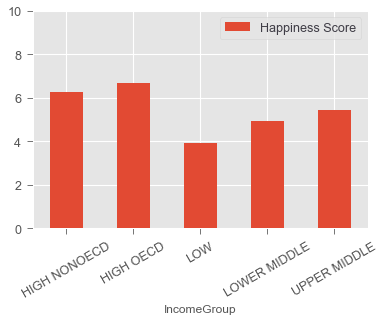

In [75]:
merged.IncomeGroup = merged.IncomeGroup.str.replace('income','').str.replace(':','').str.replace('  ',' ').str.strip().str.upper()
pv_incomes = merged.pivot_table(values='Happiness Score', index='IncomeGroup')
pv_incomes.plot(kind='bar', rot=30, ylim=(0,10))
